In [1]:
import numpy as np
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from models import Models
from morph import Morph
from sklearn.preprocessing import LabelEncoder

In [2]:
ECG_datasets = ['AtrialFibrillation', 'CardiacArrhythmia', 'CinCECGTorso',
                'ECG200', 'ECG5000', 'ECGFiveDays', 'NonInvasiveFetalECGThorax1',
                'NonInvasiveFetalECGThorax2', 'StandWalkJump', 'TwoLeadECG','NerveDamage', 'MedicalImages']


df_name = 'CinCECGTorso'
X, y = load_classification(df_name)
print("Shape of X = ", X.shape)

le = LabelEncoder()
y = le.fit_transform(y)
print(f'Classes: {np.unique(y)}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Shape of X =  (1420, 1, 1639)
Classes: [0 1 2 3]


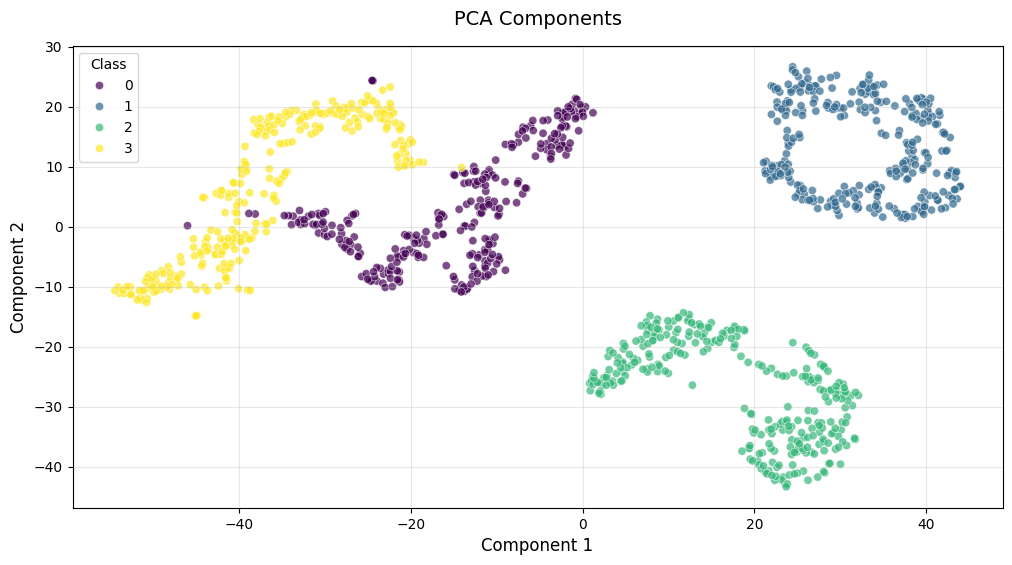

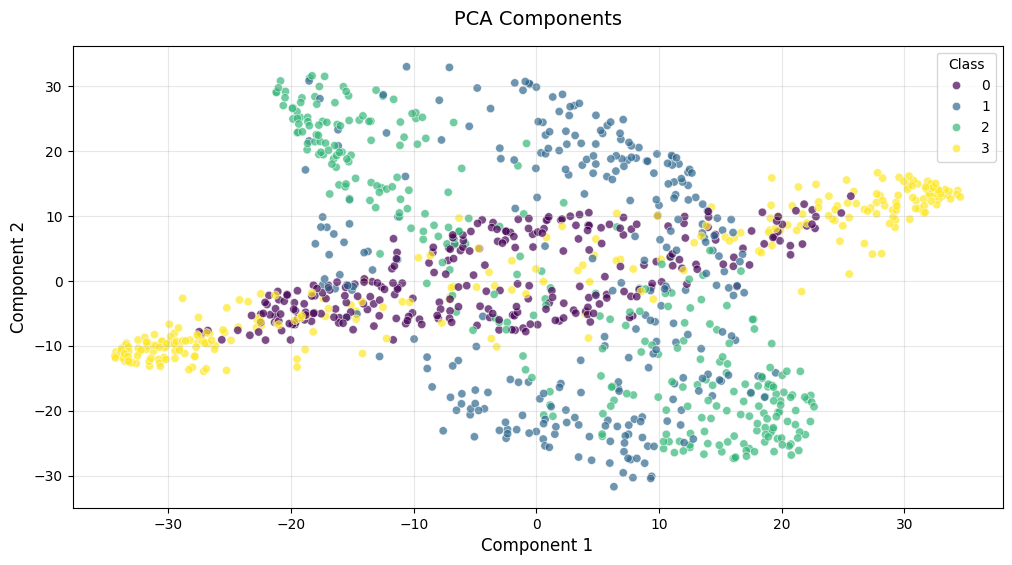

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

def getTSNE(X, n_components=2):
    tsne = TSNE(n_components=n_components)
    X_tsne = tsne.fit_transform(X)
    return X_tsne
    
def getPCA(X, n_components=2):
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)
    return X_pca

def plot_components(X, y):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='viridis', alpha=0.7)
    plt.title('PCA Components', fontsize=14, pad=15)
    plt.xlabel('Component 1', fontsize=12)
    plt.ylabel('Component 2', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(title='Class')
    plt.show()

X_tsne = getTSNE(X_train.squeeze(axis=1), 2)
plot_components(X_tsne, y_train)

X_pca = getPCA(X_train.squeeze(axis=1), 2)
plot_components(X_pca, y_train)

In [ ]:
# Train Model
lstm = Models('lstm', X_train, y_train)
lstm.train_lstm()
catch = Models('catch22', X_train, y_train)i m 
catch.train_catch22()
rocket = Models('rocket', X_train, y_train)
rocket.train_rocket()

In [ ]:
mor = Morph(X_test, y_test, np.unique(y_train)[0])
mor.get_DTWGlobalBorderline(perc_samples=0.1)

res = mor.Binay_MorphingCalculater(lstm)

In [ ]:
from sklearn.metrics import accuracy_score

pred,_ = roc.predict(X_test)
print(accuracy_score(pred, y_test))


1.0


In [ ]:
results = {}

for c in np.unique(y):
    res = {}

    mor = Morph(X_test, y_test, c)
    mor.get_DTWGlobalBorderline(perc_samples=0.1)

    res['lstm'] = mor.Binay_MorphingCalculater(lstm)
    #res['catch'] = mor.Binay_MorphingCalculater(catch)
    #res['rocket'] = mor.Binay_MorphingCalculater(rocket)

    print(c)
    results[c] = res
    columns = ['dataset', 'class', 'model', 'mean', 'std']

KeyboardInterrupt: 

In [ ]:
with open('results/lstm_multi.pkl', 'wb') as f:
    pickle.dump(results, f)

In [ ]:
with open('results/lstm_multi.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
columns = ['dataset', 'class', 'model', 'mean', 'std']

df = []
for c in results.keys():
    for model in results[c].keys():
        data = results[c][model][3]
        line = [df_name, c, model, data['mean'], data['std']]
        df.append(line)

# save to csv
df = pd.DataFrame(df, columns=columns)
df.to_csv('results/medicalimages.csv', index=False)

In [ ]:
df.head()

,dataset,class,model,mean,std
0,MedicalImages,0,lstm,0.000000,0.000000
1,MedicalImages,0,catch,0.440040,0.257144
2,MedicalImages,0,rocket,0.451297,0.243854
3,MedicalImages,1,lstm,0.000000,0.000000
4,MedicalImages,1,catch,0.367994,0.217564


In [1]:
from aeon.datasets import load_classification
from sklearn.preprocessing import LabelEncoder

ECG_datasets = ['AtrialFibrillation', 'CardiacArrhythmia', 'CinCECGTorso',
                'ECG200', 'ECG5000', 'ECGFiveDays', 'NonInvasiveFetalECGThorax1',
                'StandWalkJump', 'TwoLeadECG','NerveDamage', 'MedicalImages']

# Use a dictionary instead of a list to track sizes
dataset_sizes = {}

for df_name in ECG_datasets:
    try:
        X, y = load_classification(df_name)
        le = LabelEncoder()
        y = le.fit_transform(y)
        
        # Store the dataset size in the dictionary
        dataset_sizes[df_name] = X.shape[0]
    except:
        print(f'{df_name} Dataset Not Available')
        continue

# Sort the dictionary by size (from smallest to largest)
sorted_datasets = dict(sorted(dataset_sizes.items(), key=lambda item: item[1]))

# Print the sorted datasets with their sizes
for dataset, size in sorted_datasets.items():
    print(f"{dataset}: {size} samples")

CardiacArrhythmia Dataset Not Available
StandWalkJump: 27 samples
AtrialFibrillation: 30 samples
ECG200: 200 samples
NerveDamage: 204 samples
ECGFiveDays: 884 samples
MedicalImages: 1141 samples
TwoLeadECG: 1162 samples
CinCECGTorso: 1420 samples
NonInvasiveFetalECGThorax1: 3765 samples
ECG5000: 5000 samples


In [ ]:
import numpy as np
from aeon.datasets import load_classification
from sklearn.model_selection import train_test_split
import pickle
import pandas as pd
from models import Models
from morph import Morph
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

results = {}

for df_name,_ in sorted_datasets.items():
    try:
        X, y = load_classification(df_name)
        le = LabelEncoder()
        y = le.fit_transform(y)
    except:
        print(df_name, 'Dataset Not Available')
        continue


    if X.shape[1] != 1:
        print(df_name, 'Multivariate Time Series')
        continue

    print('-'*60)
    print(df_name)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Models
    start = time.time()
    lstm = Models('lstm', X_train, y_train)
    lstm.train_lstm()
    catch = Models('catch22', X_train, y_train)
    catch.train_catch22()
    rocket = Models('rocket', X_train, y_train)
    rocket.train_rocket()

    training_time = time.time()
    print('Training time: ', training_time-start)

    models = (lstm, catch, rocket)
    acc = {}
    for m in models:
        pred,_ = m.predict(X_test)
        acc[m.model_name] = accuracy_score(pred, y_test)

    # Loop through class
    for c in np.unique(y):
        start = time.time()
        res = {}
        print(c)
        mor = Morph(X_test, y_test, c)
        mor.get_DTWGlobalBorderline(perc_samples=0.1)

        res = mor.Binary_MorphingCalculater(models)
                  
        end_class = time.time()
        print(f'Total Class {c} run time: {end_class-training_time}')

        results[c] = res
        del res
        
        with open('results/experiments.pkl', 'wb') as f:
            pickle.dump(results, f)

    del models, lstm, catch, rocket

    with open('results/experiments.pkl', 'rb') as f:
        data = pickle.load(f)
    
    df = []
    for c in results.keys():
        for model in results[c].keys(): 
            data = results[c][model]['metrics']
            line = [df_name, c, model, data['mean'], data['std'], acc[model], X_test.shape[2]]
            df.append(line)

    # save to csv
    columns = ['dataset', 'class', 'model', 'mean', 'std', 'model_acc', 'ts_lenght']
    df = pd.DataFrame(df, columns=columns)
    df.to_csv('results/experiments.csv', index=False)


StandWalkJump Multivariate Time Series
AtrialFibrillation Multivariate Time Series
------------------------------------------------------------
ECG200
Training time:  10.359260082244873
0


100%|██████████| 35/35 [00:21<00:00,  1.66it/s]


Total Class 0 run time: 22.215290784835815
1


100%|██████████| 35/35 [00:21<00:00,  1.64it/s]


Total Class 1 run time: 43.610562324523926
------------------------------------------------------------
NerveDamage
Training time:  20.070412158966064
0


100%|██████████| 21/21 [02:03<00:00,  5.90s/it]


Total Class 0 run time: 130.01321625709534
1


 15%|█▌        | 6/39 [00:34<03:11,  5.81s/it]